In [3]:
import matplotlib.pyplot as plt
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy import displacy
from pathlib import Path

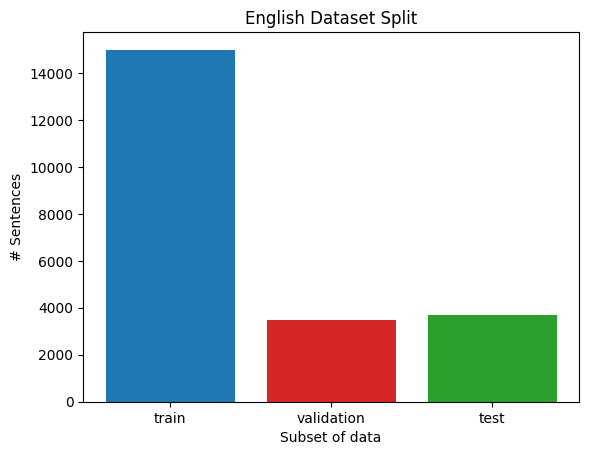

In [4]:
fig, ax = plt.subplots()
data = ['train', 'validation', 'test']
counts = [14987, 3466, 3684]
bar_colors = ['tab:blue', 'tab:red', 'tab:green']

ax.bar(data, counts, color=bar_colors)
ax.set_ylabel("# Sentences")
ax.set_xlabel("Subset of data")
ax.set_title("English Dataset Split")
plt.savefig(fname="English dataset split")
plt.show()

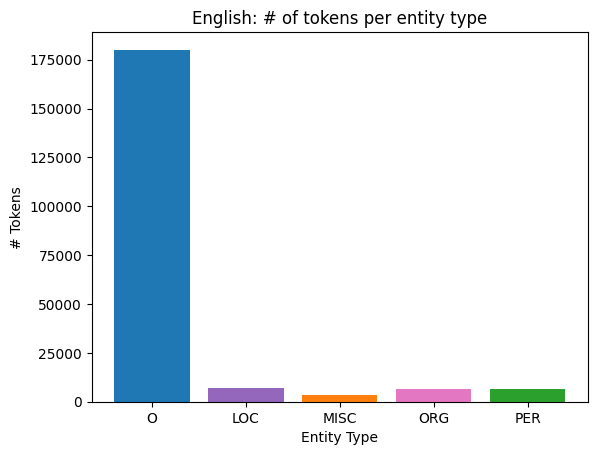

In [5]:
fig, ax = plt.subplots()
data = ['O', 'LOC', 'MISC', 'ORG', 'PER']
counts = [180122, 7140, 3438, 6321, 6600]
bar_colors = ['tab:blue', 'tab:purple', 'tab:orange', 'tab:pink', 'tab:green']

ax.bar(data, counts, color=bar_colors)
ax.set_ylabel("# Tokens")
ax.set_xlabel("Entity Type")
ax.set_title("English: # of tokens per entity type")
plt.savefig(fname="English # tokens")
plt.show()

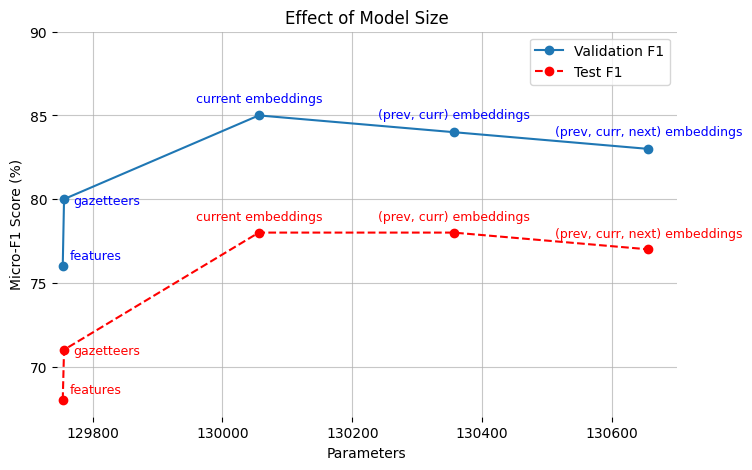

In [6]:
# do comparision of different embeddings; micro-F1 is reported

validation_f1 = [76, 80, 85, 84, 83]
test_f1 = [68, 71, 78, 78, 77]
params = [129754, 129756, 130056, 130356, 130656]
descriptions = ['features', 'gazetteers','current embeddings','(prev, curr) embeddings','(prev, curr, next) embeddings']

plt.figure(figsize=(8, 5))
plt.plot(params, validation_f1, label="Validation F1", marker='o', linestyle='-')
plt.plot(params, test_f1, label="Test F1", marker='o', linestyle='--', color='red')

plt.ylim(67, 90) 
plt.xlim(129745, 130700)

for x, y, desc in zip(params, validation_f1, descriptions):
    if x == 129754:
        plt.text(x+50, y + 0.4, desc, fontsize=9, ha='center', color='blue')
    elif x == 129756:
        plt.text(x+65, y - 0.3, desc, fontsize=9, ha='center', color='blue')
    else:    
        plt.text(x, y + 0.8, desc, fontsize=9, ha='center', color='blue')
        
for x, y, desc in zip(params, test_f1, descriptions):
    if x == 129754:
        plt.text(x+50, y + 0.4, desc, fontsize=9, ha='center', color='red')
    elif x == 129756:
        plt.text(x+65, y - 0.3, desc, fontsize=9, ha='center', color='red')
    else:    
        plt.text(x, y + 0.7, desc, fontsize=9, ha='center', color='red')

plt.title("Effect of Model Size")
plt.xlabel('Parameters')
plt.ylabel("Micro-F1 Score (%)")
plt.grid(alpha=0.7)
plt.legend()
plt.tight_layout
plt.box(False)
plt.savefig(fname="Model size")
plt.show()

In [ ]:
# note: spacy==3.5.0 was used and this may not display under the package.
text = "The University of Arizona is a public land-grant university located in Tucson, Arizona. The unversity\
        was established in 1885, and 27 years later, Arizona became a state. The Arizona Mascot Program \
        consists of two mascots, Wilbur and Wilma. The "

doc = nlp(text)

In [ ]:
displacy.render(doc, style='ent',jupyter=True)

In [ ]:
# svg = displacy.render(doc, style='ent',jupyter=False)
# with open("entities.html", "w", encoding="utf-8") as f:
#     f.write(svg)